In [1]:
import numpy as np
from sympy import * 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
rational = lambda x: all(i.exp.is_Integer for i in x.atoms(Pow))

def check_value_fmt(val):
    if rational(val):
         return "{}".format(float(val)) 
    else:
        if val>0:
            return "{}".format(val).replace("sqrt", "Math.sqrt")
        else:
            return "-{}".format(abs(val)).replace("sqrt", "Math.sqrt")
            
    
def getshapevalues(height_value, vertices=8, width=1, global_ind=0):
    coords, coords_symbolic = [], []
    
    for ind, value  in enumerate(range(vertices), start=1):
        x = cos(2*value*pi/vertices) * width
        y = sin(2*value*pi/vertices) * width
        x_fmt = check_value_fmt(x)
        y_fmt = check_value_fmt(y)
        fmt_f = "vec4({}, {}, {}, 1.0), // point {}".format(x_fmt, y_fmt, height_value, global_ind)
        print(fmt_f)
        np_x = np.cos(2*value*np.pi/vertices)*width
        np_y = np.sin(2*value*np.pi/vertices)*width
        #print(np_x, np_y)
        fmt_f_v2 = "vec4({}\n{}\n{}),".format(x_fmt, y_fmt, height_value)
        coords_symbolic.append(fmt_f_v2)
        coords.append([np_x, np_y])
        global_ind+=1
    
    fmt_f = "vec4({}, {}, {}, 1.0), // point (centroid) {}".format(0, 0, height_value, global_ind)
    print(fmt_f)
    global_ind+=1
    return coords, coords_symbolic, global_ind

def plot_octagon(coords, coords_symbolic, title):
    test = coords[0]
    coords.append(test)
    xs, ys = zip(*coords) #create lists of x and y values
    #xs_sym, ys_sym = zip(*coords_symbolic)
    fig, ax = plt.subplots(figsize=(15, 15))

    for i in range(len(xs)-1):
        fmt = "{}".format(coords_symbolic[i])
        ax.annotate(fmt, (xs[i], ys[i]))
        
        

    ax.set_title("{}\n".format(title))
    ax.plot(xs,ys)
    ax.plot(xs,ys, ".") 
    ax.set_aspect('equal')
    plt.show() # if you need...

# Octagons


// bottommost octagon
vec4(0.6, 0.0, -2.0, 1.0), // point 0
vec4(0.3*Math.sqrt(2), 0.3*Math.sqrt(2), -2.0, 1.0), // point 1
vec4(0.0, 0.6, -2.0, 1.0), // point 2
vec4(-0.3*Math.sqrt(2), 0.3*Math.sqrt(2), -2.0, 1.0), // point 3
vec4(-0.6, 0.0, -2.0, 1.0), // point 4
vec4(-0.3*Math.sqrt(2), -0.3*Math.sqrt(2), -2.0, 1.0), // point 5
vec4(0.0, -0.6, -2.0, 1.0), // point 6
vec4(0.3*Math.sqrt(2), -0.3*Math.sqrt(2), -2.0, 1.0), // point 7
vec4(0, 0, -2.0, 1.0), // point (centroid) 8


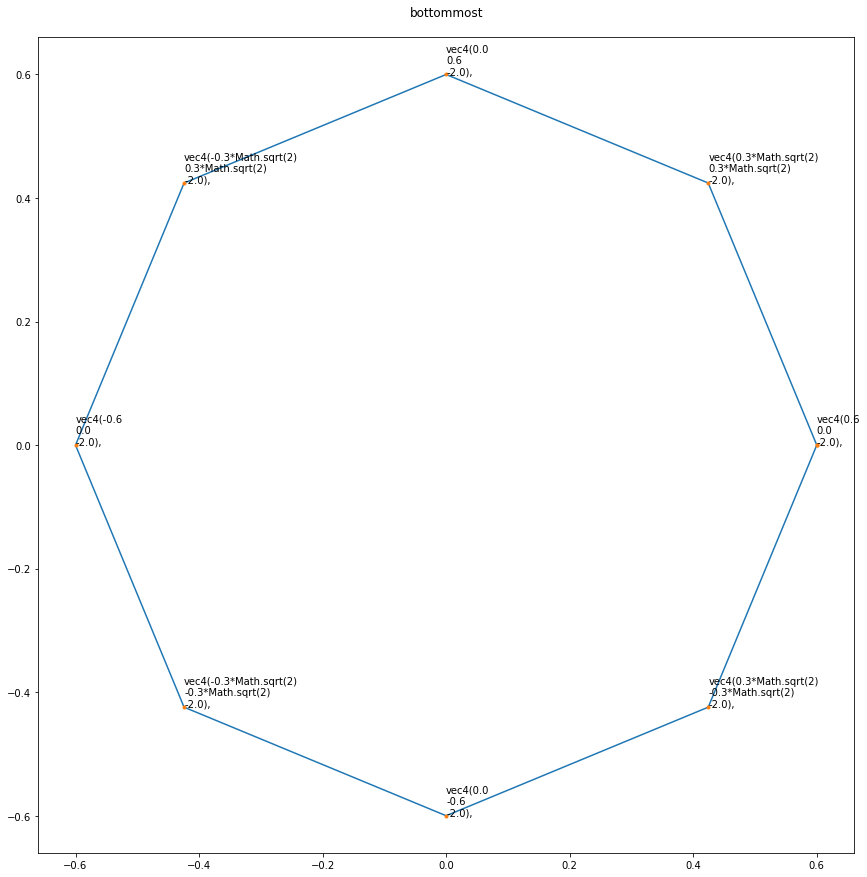


// central lower  octagon
vec4(0.15, 0.0, -0.3, 1.0), // point 9
vec4(0.075*Math.sqrt(2), 0.075*Math.sqrt(2), -0.3, 1.0), // point 10
vec4(0.0, 0.15, -0.3, 1.0), // point 11
vec4(-0.075*Math.sqrt(2), 0.075*Math.sqrt(2), -0.3, 1.0), // point 12
vec4(-0.15, 0.0, -0.3, 1.0), // point 13
vec4(-0.075*Math.sqrt(2), -0.075*Math.sqrt(2), -0.3, 1.0), // point 14
vec4(0.0, -0.15, -0.3, 1.0), // point 15
vec4(0.075*Math.sqrt(2), -0.075*Math.sqrt(2), -0.3, 1.0), // point 16
vec4(0, 0, -0.3, 1.0), // point (centroid) 17


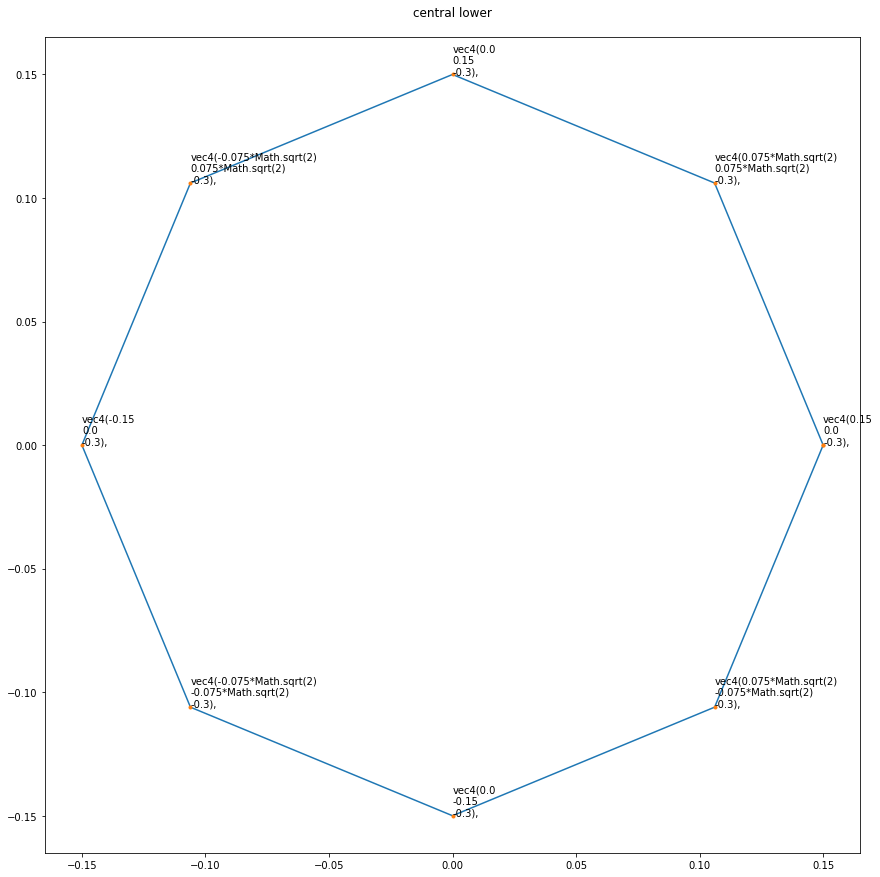


// central upper octagon
vec4(0.15, 0.0, 0.3, 1.0), // point 18
vec4(0.075*Math.sqrt(2), 0.075*Math.sqrt(2), 0.3, 1.0), // point 19
vec4(0.0, 0.15, 0.3, 1.0), // point 20
vec4(-0.075*Math.sqrt(2), 0.075*Math.sqrt(2), 0.3, 1.0), // point 21
vec4(-0.15, 0.0, 0.3, 1.0), // point 22
vec4(-0.075*Math.sqrt(2), -0.075*Math.sqrt(2), 0.3, 1.0), // point 23
vec4(0.0, -0.15, 0.3, 1.0), // point 24
vec4(0.075*Math.sqrt(2), -0.075*Math.sqrt(2), 0.3, 1.0), // point 25
vec4(0, 0, 0.3, 1.0), // point (centroid) 26


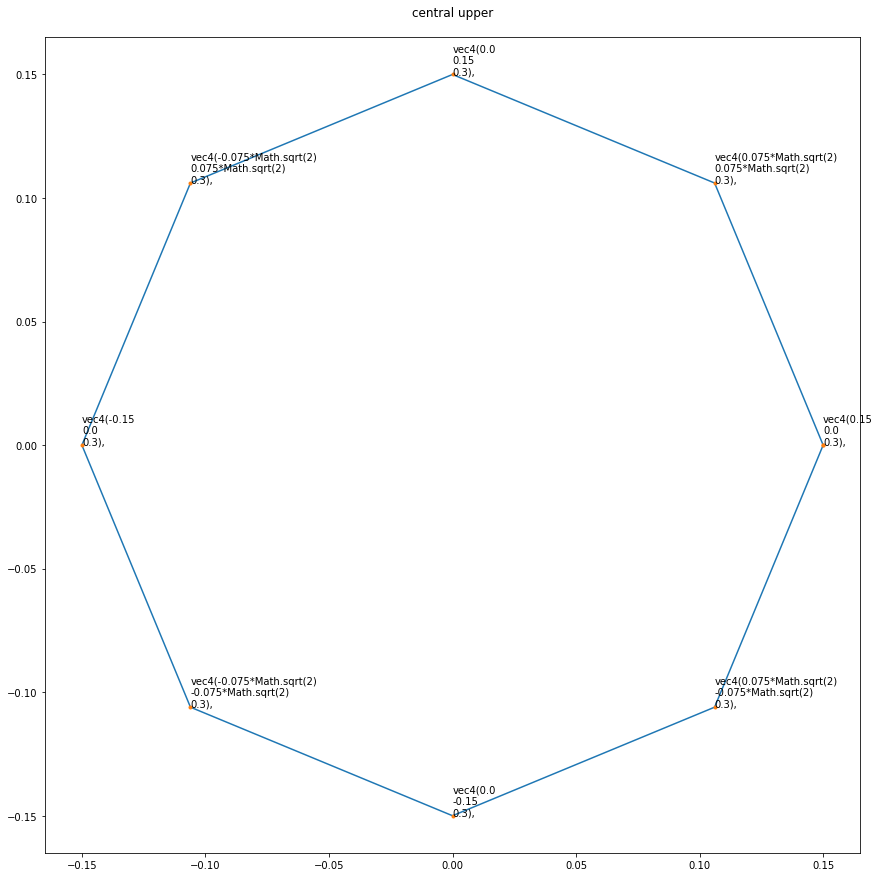


// topmost octagon
vec4(0.6, 0.0, 2.0, 1.0), // point 27
vec4(0.3*Math.sqrt(2), 0.3*Math.sqrt(2), 2.0, 1.0), // point 28
vec4(0.0, 0.6, 2.0, 1.0), // point 29
vec4(-0.3*Math.sqrt(2), 0.3*Math.sqrt(2), 2.0, 1.0), // point 30
vec4(-0.6, 0.0, 2.0, 1.0), // point 31
vec4(-0.3*Math.sqrt(2), -0.3*Math.sqrt(2), 2.0, 1.0), // point 32
vec4(0.0, -0.6, 2.0, 1.0), // point 33
vec4(0.3*Math.sqrt(2), -0.3*Math.sqrt(2), 2.0, 1.0), // point 34
vec4(0, 0, 2.0, 1.0), // point (centroid) 35


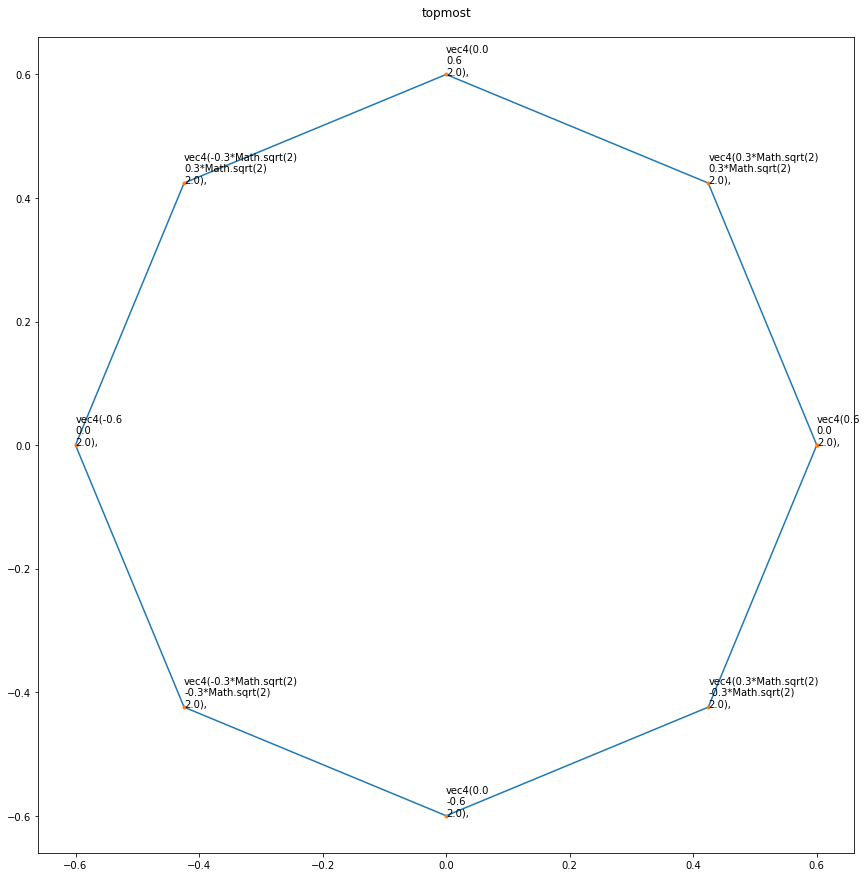

In [3]:
# bottommost octagon
plot = True
global_ind = 0 
print("\n// bottommost octagon")
coords, coords_symbolic, global_ind = getshapevalues(height_value=-2.0, width=0.6, global_ind=global_ind)
if plot:
    plot_octagon(coords, coords_symbolic, title='bottommost')
# central lower  octagon
print("\n// central lower  octagon")
coords, coords_symbolic, global_ind = getshapevalues(height_value=-0.3, width=0.15, global_ind=global_ind)
if plot:
    plot_octagon(coords, coords_symbolic, title='central lower')
# central upper octagon
print("\n// central upper octagon")
coords, coords_symbolic, global_ind = getshapevalues(height_value=0.3, width=0.15, global_ind=global_ind)
if plot:
    plot_octagon(coords, coords_symbolic, title='central upper')
# topmost octagon
print("\n// topmost octagon")
coords, coords_symbolic, global_ind = getshapevalues(height_value=2.0, width=0.6, global_ind=global_ind)
if plot:
    plot_octagon(coords, coords_symbolic, title='topmost')

In [103]:
def tri_print(m, n):
    for i in range(m,n):
        if n<8:
            if i==n-1:
                 print("tri({}, {}, {});".format(i, m, n))
            else:
                print("tri({}, {}, {});".format(i, i+1,  n))
        else:
            if i==n-1:
                 print("tri({}, {}, {});".format(n, i, m))
            else:
                print("tri({}, {}, {});".format(n, i, i+1))

tri_print(0, 8)
tri_print(27, 35)

tri(8, 0, 1);
tri(8, 1, 2);
tri(8, 2, 3);
tri(8, 3, 4);
tri(8, 4, 5);
tri(8, 5, 6);
tri(8, 6, 7);
tri(8, 7, 0);
tri(35, 27, 28);
tri(35, 28, 29);
tri(35, 29, 30);
tri(35, 30, 31);
tri(35, 31, 32);
tri(35, 32, 33);
tri(35, 33, 34);
tri(35, 34, 27);


In [104]:
vertices = 2*8*3
vertices

48

In [105]:
perms = lambda r: [(i, i+1) for i in  r]
def quad_print(r1,r2):
    pr1 = perms(r1)
    pr2 = perms(r2)
    for i in range(len(r1)):
        print("quad({}, {}, {}, {}); ".format(*pr1[i], pr2[i][1], pr2[i][0]))
    
    #print(pr1, pr2)
    print("quad({}, {}, {}, {}); ".format(pr1[-1][1], pr1[0][0], pr2[0][0], pr2[-1][1]))
    
quad_print(range(0,7), range(9,16))
#print("---")
quad_print(range(9, 16), range(18, 25))
#print("---")
quad_print(range(18, 25), range(27,34))

quad(0, 1, 10, 9); 
quad(1, 2, 11, 10); 
quad(2, 3, 12, 11); 
quad(3, 4, 13, 12); 
quad(4, 5, 14, 13); 
quad(5, 6, 15, 14); 
quad(6, 7, 16, 15); 
quad(7, 0, 9, 16); 
quad(9, 10, 19, 18); 
quad(10, 11, 20, 19); 
quad(11, 12, 21, 20); 
quad(12, 13, 22, 21); 
quad(13, 14, 23, 22); 
quad(14, 15, 24, 23); 
quad(15, 16, 25, 24); 
quad(16, 9, 18, 25); 
quad(18, 19, 28, 27); 
quad(19, 20, 29, 28); 
quad(20, 21, 30, 29); 
quad(21, 22, 31, 30); 
quad(22, 23, 32, 31); 
quad(23, 24, 33, 32); 
quad(24, 25, 34, 33); 
quad(25, 18, 27, 34); 


In [106]:
vertices_quad = 8*6*3
vertices_quad

144

In [107]:
vertices+vertices_quad

192

In [77]:
 quad(7, 0, 9, 16); 
    
pr1[-1][1], pr1[0][0], pr2[0][0], pr2[-1][1]

48